In [1]:
!pip install mahotas

In [2]:
from glob import glob
import mahotas as mh
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
images = glob('SimpleImageDataset/*.jpg')
images

['SimpleImageDataset\\building00.jpg',
 'SimpleImageDataset\\building01.jpg',
 'SimpleImageDataset\\building02.jpg',
 'SimpleImageDataset\\building03.jpg',
 'SimpleImageDataset\\building04.jpg',
 'SimpleImageDataset\\building05.jpg',
 'SimpleImageDataset\\building06.jpg',
 'SimpleImageDataset\\building07.jpg',
 'SimpleImageDataset\\building08.jpg',
 'SimpleImageDataset\\building09.jpg',
 'SimpleImageDataset\\building10.jpg',
 'SimpleImageDataset\\building11.jpg',
 'SimpleImageDataset\\building12.jpg',
 'SimpleImageDataset\\building13.jpg',
 'SimpleImageDataset\\building14.jpg',
 'SimpleImageDataset\\building15.jpg',
 'SimpleImageDataset\\building16.jpg',
 'SimpleImageDataset\\building17.jpg',
 'SimpleImageDataset\\building18.jpg',
 'SimpleImageDataset\\building19.jpg',
 'SimpleImageDataset\\building20.jpg',
 'SimpleImageDataset\\building21.jpg',
 'SimpleImageDataset\\building22.jpg',
 'SimpleImageDataset\\building23.jpg',
 'SimpleImageDataset\\building24.jpg',
 'SimpleImageDataset\\bui

In [4]:
images[0][21:-len('00.jpg')]

'ilding'

In [5]:
im = mh.imread(images[0])
im = mh.colors.rgb2gray(im, dtype=np.uint8)
im

array([[120, 118, 121, ..., 127, 128, 127],
       [122, 123, 118, ..., 122, 124, 126],
       [130, 131, 116, ..., 122, 125, 129],
       ...,
       [186, 186, 186, ...,  66,  57,  50],
       [185, 186, 186, ...,  63,  63,  68],
       [185, 186, 187, ...,  64,  69,  67]], dtype=uint8)

In [7]:
mh.features.haralick(im)

array([[ 5.70740420e-04,  9.29922585e+01,  9.88476474e-01,
         4.03488718e+03,  3.48762737e-01,  2.87758085e+02,
         1.60465565e+04,  8.76326757e+00,  1.20447310e+01,
         5.30650207e-04,  3.54618012e+00, -4.50068519e-01,
         9.99541709e-01],
       [ 4.17601673e-04,  1.84191292e+02,  9.77177287e-01,
         4.03526281e+03,  2.71734785e-01,  2.87754186e+02,
         1.59568599e+04,  8.75964040e+00,  1.26564341e+01,
         3.72037267e-04,  4.12830424e+00, -3.71347677e-01,
         9.98441348e-01],
       [ 5.66478396e-04,  1.11760252e+02,  9.86153606e-01,
         4.03571685e+03,  3.35562051e-01,  2.87774494e+02,
         1.60311072e+04,  8.75812858e+00,  1.21828902e+01,
         4.94560425e-04,  3.68527385e+00, -4.32270736e-01,
         9.99395575e-01],
       [ 4.09786828e-04,  2.03006994e+02,  9.74845874e-01,
         4.03526236e+03,  2.69870402e-01,  2.87754211e+02,
         1.59380424e+04,  8.76069923e+00,  1.26974765e+01,
         3.66355211e-04,  4.17234869e

In [9]:
import time

features = []
labels = []

start = time.time()
for im in images:
    labels.append(im[21:-len('00.jpg')])
    im = mh.imread(im)
    im = mh.colors.rgb2gray(im, dtype=np.uint8)
    features.append(mh.features.haralick(im).ravel())
    
print('fit time : ', time.time() - start)

fit time :  40.08699369430542


In [10]:
features = np.array(features)
labels = np.array(labels)
features

array([[ 5.70740420e-04,  9.29922585e+01,  9.88476474e-01, ...,
         4.17234869e+00, -3.66066258e-01,  9.98307895e-01],
       [ 5.07181237e-04,  1.21654892e+02,  9.86972361e-01, ...,
         3.99440020e+00, -3.87805787e-01,  9.98737503e-01],
       [ 9.01828221e-04,  7.31456510e+01,  9.93057105e-01, ...,
         3.66279543e+00, -4.18803823e-01,  9.99099209e-01],
       ...,
       [ 3.30767607e-03,  9.74008367e+01,  9.59013494e-01, ...,
         3.76015546e+00, -3.25142448e-01,  9.91127633e-01],
       [ 2.27345794e-03,  8.77078723e+01,  9.56267815e-01, ...,
         3.76246315e+00, -3.17620773e-01,  9.91220843e-01],
       [ 2.72396412e-03,  8.79135854e+00,  9.88956970e-01, ...,
         2.73562168e+00, -4.44611523e-01,  9.97988747e-01]])

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [12]:
clf = Pipeline([('preproc', StandardScaler()),
                ('classifier', LogisticRegression())])
clf

Pipeline(steps=[('preproc', StandardScaler()),
                ('classifier', LogisticRegression())])

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, features, labels)
scores

array([0.88888889, 0.72222222, 0.94444444, 0.83333333, 0.94444444])

In [14]:
print('Accuracy: {:.2%}'.format(scores.mean()))

Accuracy: 86.67%


In [15]:
from scipy.spatial import distance

sc = StandardScaler()
features = sc.fit_transform(features)

dists = distance.squareform(distance.pdist(features))

In [16]:
dists

array([[ 0.        ,  3.24148757,  3.96108909, ...,  9.0247153 ,
         7.91232588, 11.03770366],
       [ 3.24148757,  0.        ,  2.63133138, ..., 10.19494685,
         9.01592519, 11.39764885],
       [ 3.96108909,  2.63133138,  0.        , ...,  9.75789551,
         9.02034868, 10.31137622],
       ...,
       [ 9.0247153 , 10.19494685,  9.75789551, ...,  0.        ,
         2.98267711,  7.4307865 ],
       [ 7.91232588,  9.01592519,  9.02034868, ...,  2.98267711,
         0.        ,  6.97130443],
       [11.03770366, 11.39764885, 10.31137622, ...,  7.4307865 ,
         6.97130443,  0.        ]])

In [17]:
def selectImage(n, m, dists, images):
    image_position = dists[n].argsort()[m]
    image = mh.imread(images[image_position])
    return image

In [18]:
def plotImages(n):
    fig, ax = plt.subplots(1,4, figsize=(15,5))
    
    for i in range(4):
        ax[i].imshow(selectImage(n, i, dists, images))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        
    plt.show()

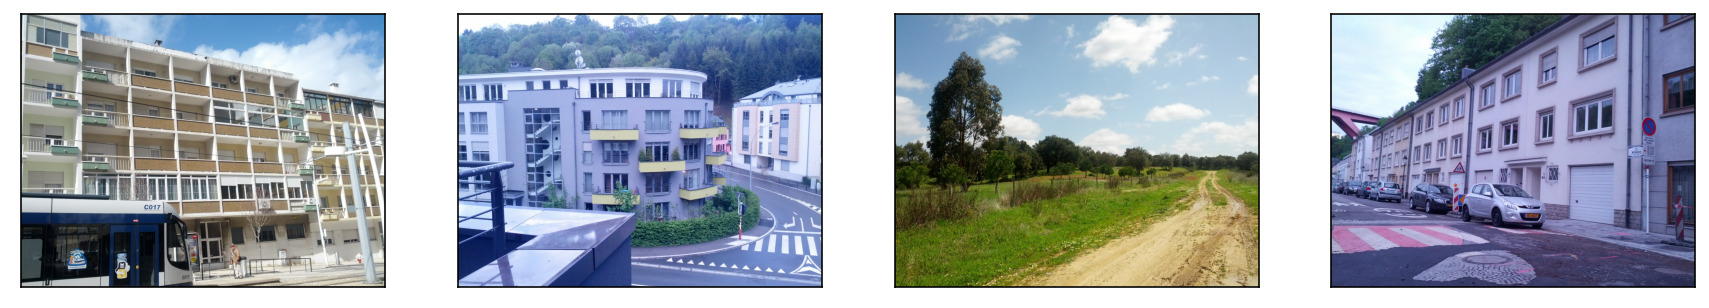

In [19]:
#0번 그림과 유사한 그림
plotImages(0)

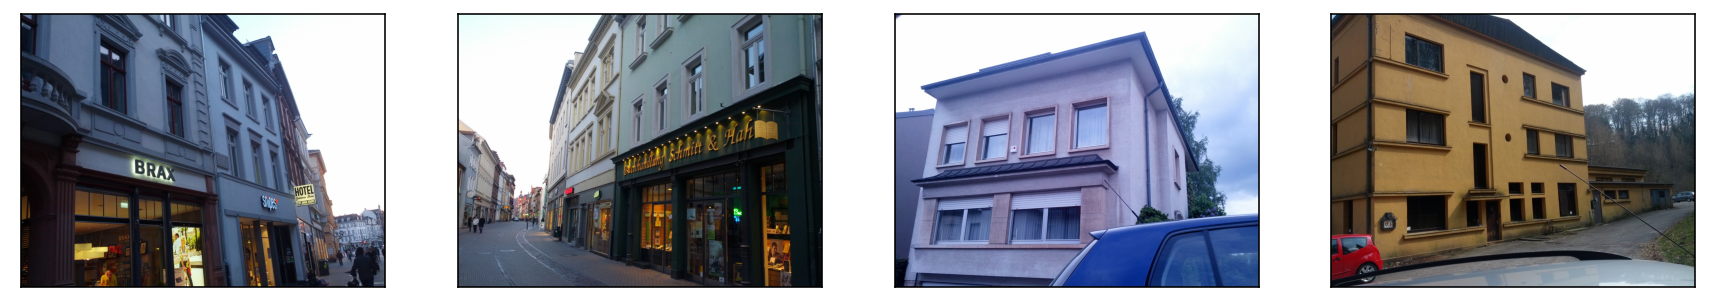

In [20]:
#11번과 유사한 그림
plotImages(11)

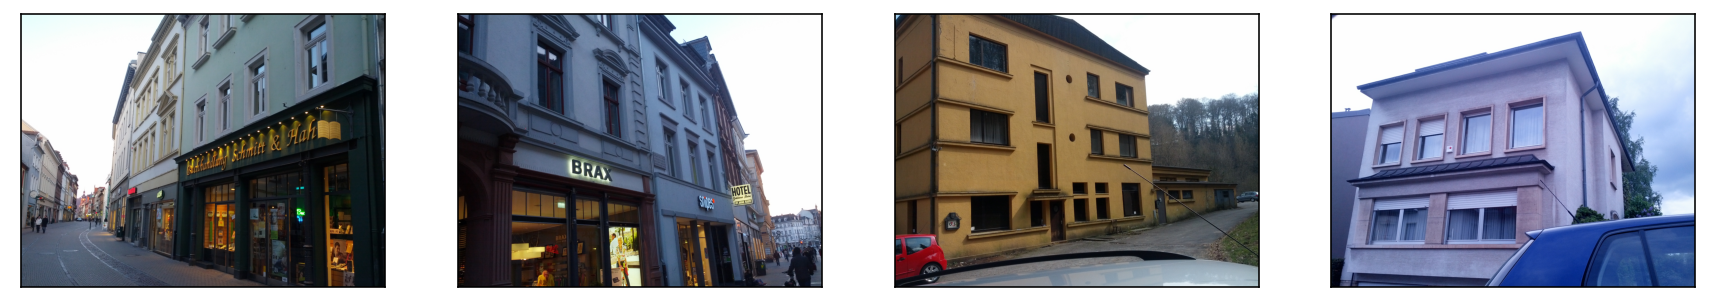

In [21]:
plotImages(10)

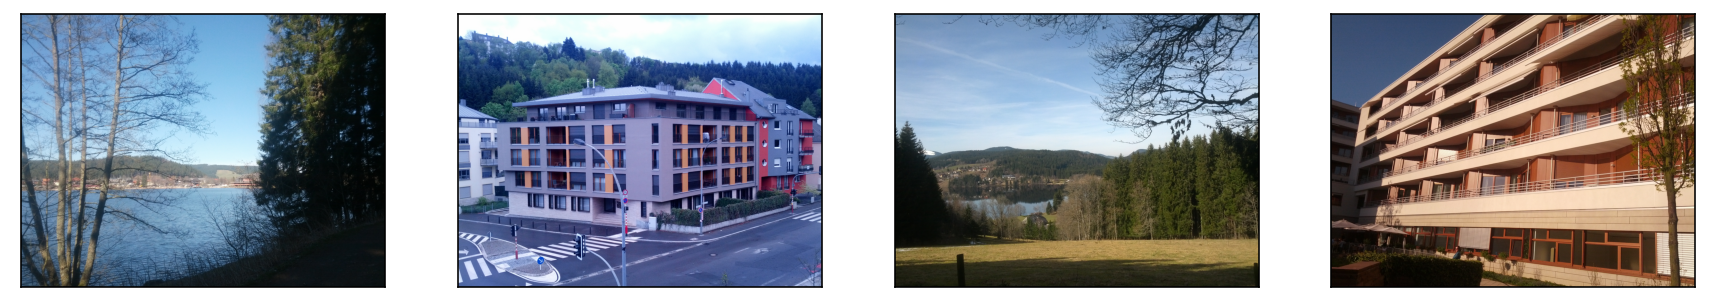

In [22]:
plotImages(31)

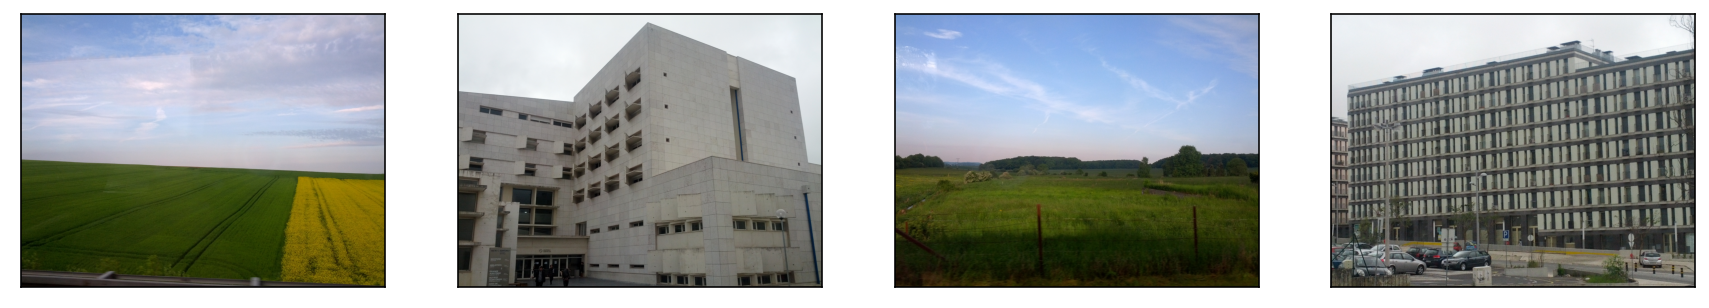

In [23]:
plotImages(32)

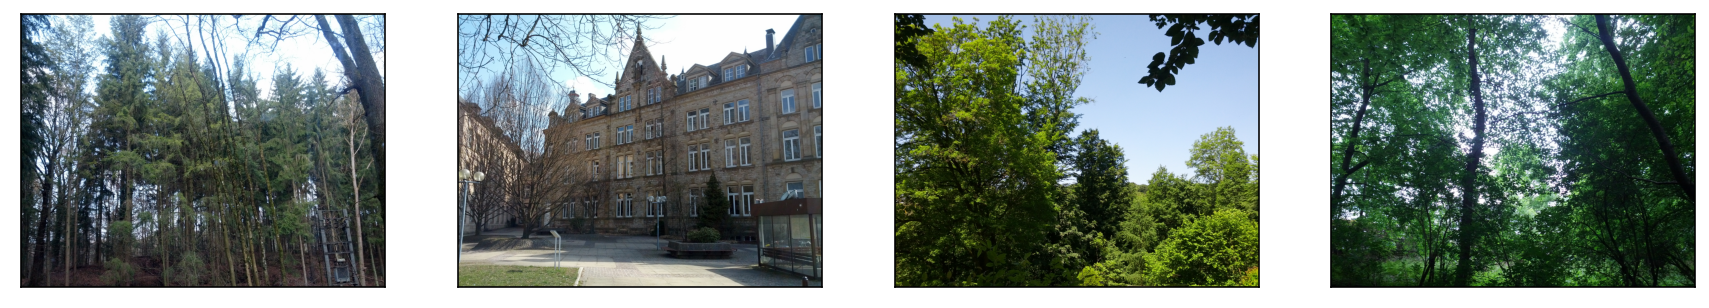

In [24]:
plotImages(40)

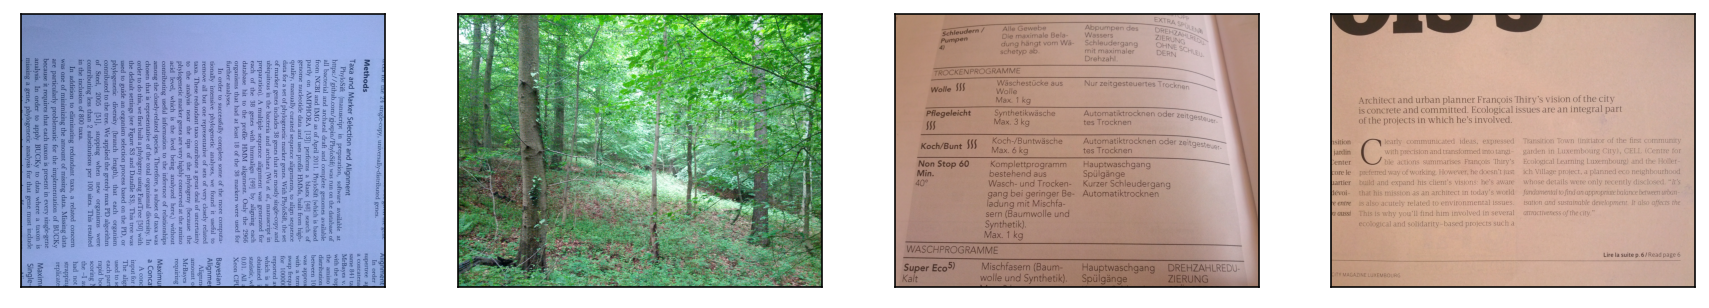

In [26]:
plotImages(60)